In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-66.90732861987432 4.372947040685972
38.58513174047263 -170.72099967076636
-73.67481070395534 177.97010658179255
-84.3203546315738 -134.40293853022638
-54.11719083119162 35.31121986604248
-87.26450951225317 14.096265732569293
-78.64657081649209 110.32314797124883
42.53741319427655 8.958156899021589
19.797952243353706 8.045302592593941
-7.098902679341407 -102.05911285838754
50.6410457176801 69.49291634633695
-70.52592109330278 57.351335421404826
45.57604544345591 13.665612704794484
7.086302811710766 91.34289774010159
-8.741366658283184 -150.1842743410555
60.563099576450895 -89.39596091205024
26.48875087185148 -177.17947451334572
-26.242168740210815 -68.19333554485328
-29.407234294760777 -35.13413319162416
-78.19011668114392 -105.04516799170939
-53.344717777890274 176.49230002303443
29.407000532770496 -107.62923979103502
-70.19380388363359 2.91672393603244
63.337582692619605 145.89693443818072
-35.30548185603814 -19.259571979502823
79.12497858500262 -115.27193572494298
-9.267221169093574

In [5]:
print(len(coordinates))

1500


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [9]:

#Build basic URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    #we are removing the blank spaces in the city name and concatenating the city name
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | bastia
Processing Record 9 of Set 1 | arlit
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | atbasar
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | izola
Processing Record 14 of Set 1 | sabang
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | diego de almagro
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | dunedin
Processing Record 21 of Set 1 | benito juarez
Processing Record 22 of Set 1 | kadykchan
Ci

Processing Record 36 of Set 4 | maridi
Processing Record 37 of Set 4 | chokurdakh
Processing Record 38 of Set 4 | yazoo city
Processing Record 39 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 40 of Set 4 | ponta delgada
Processing Record 41 of Set 4 | isangel
Processing Record 42 of Set 4 | nanortalik
Processing Record 43 of Set 4 | coihaique
Processing Record 44 of Set 4 | kadoma
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | bull savanna
Processing Record 47 of Set 4 | inongo
Processing Record 48 of Set 4 | zelenogorskiy
Processing Record 49 of Set 4 | maxixe
Processing Record 50 of Set 4 | nushki
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | malanje
Processing Record 3 of Set 5 | codrington
Processing Record 4 of Set 5 | lexington
Processing Record 5 of Set 5 | silver city
Processing Record 6 of Set 5 | teahupoo
Processing Record 7 of Set 5 | alice town
Processing Record 8 of Set 5 | burkhala
City not foun

Processing Record 26 of Set 8 | rosetta
Processing Record 27 of Set 8 | ongole
Processing Record 28 of Set 8 | hobyo
Processing Record 29 of Set 8 | rungata
City not found. Skipping...
Processing Record 30 of Set 8 | samsun
Processing Record 31 of Set 8 | port maria
Processing Record 32 of Set 8 | ye
City not found. Skipping...
Processing Record 33 of Set 8 | mushie
Processing Record 34 of Set 8 | nioro
Processing Record 35 of Set 8 | zharkent
Processing Record 36 of Set 8 | szentes
Processing Record 37 of Set 8 | pisco
Processing Record 38 of Set 8 | cap-aux-meules
Processing Record 39 of Set 8 | bandarbeyla
Processing Record 40 of Set 8 | geraldton
Processing Record 41 of Set 8 | tampakan
Processing Record 42 of Set 8 | ust-tsilma
Processing Record 43 of Set 8 | san lawrenz
Processing Record 44 of Set 8 | nizwa
Processing Record 45 of Set 8 | balykshi
Processing Record 46 of Set 8 | haines junction
Processing Record 47 of Set 8 | atar
Processing Record 48 of Set 8 | songling
Processi

Processing Record 14 of Set 12 | college
Processing Record 15 of Set 12 | carlisle
Processing Record 16 of Set 12 | atherton
Processing Record 17 of Set 12 | ochamchira
Processing Record 18 of Set 12 | crotone
Processing Record 19 of Set 12 | oriximina
Processing Record 20 of Set 12 | quatre cocos
Processing Record 21 of Set 12 | mareeba
Processing Record 22 of Set 12 | killam
Processing Record 23 of Set 12 | gushikawa
Processing Record 24 of Set 12 | china
Processing Record 25 of Set 12 | krasnyy kut
Processing Record 26 of Set 12 | beruwala
Processing Record 27 of Set 12 | uray
Processing Record 28 of Set 12 | san antonio
Processing Record 29 of Set 12 | murgab
Processing Record 30 of Set 12 | ambanja
Processing Record 31 of Set 12 | dahuk
Processing Record 32 of Set 12 | seoul
Processing Record 33 of Set 12 | belyy yar
Processing Record 34 of Set 12 | spetsai
City not found. Skipping...
Processing Record 35 of Set 12 | big spring
Processing Record 36 of Set 12 | dudinka
Processing R

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,55.80,79,38,4.16,ZA,2022-05-07 20:23:58
1,Kapaa,22.0752,-159.3190,80.58,83,100,19.57,US,2022-05-07 20:23:00
2,Kaitangata,-46.2817,169.8464,54.19,92,100,1.10,NZ,2022-05-07 20:23:59
3,Rikitea,-23.1203,-134.9692,77.36,83,70,12.50,PF,2022-05-07 20:24:00
4,Port Alfred,-33.5906,26.8910,64.18,80,100,4.00,ZA,2022-05-07 20:24:00
5,Bredasdorp,-34.5322,20.0403,54.93,89,40,1.74,ZA,2022-05-07 20:24:01
6,Albany,42.6001,-73.9662,59.43,33,100,1.01,US,2022-05-07 20:24:01
7,Bastia,42.6667,9.3333,64.29,71,100,9.22,FR,2022-05-07 20:24:01
8,Arlit,18.7369,7.3853,95.52,12,100,8.12,NE,2022-05-07 20:24:02
9,Puerto Ayora,-0.7393,-90.3518,78.76,79,40,9.91,EC,2022-05-07 20:24:03


In [12]:
new_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-05-07 20:23:58,-34.4187,19.2345,55.80,79,38,4.16
1,Kapaa,US,2022-05-07 20:23:00,22.0752,-159.3190,80.58,83,100,19.57
2,Kaitangata,NZ,2022-05-07 20:23:59,-46.2817,169.8464,54.19,92,100,1.10
3,Rikitea,PF,2022-05-07 20:24:00,-23.1203,-134.9692,77.36,83,70,12.50
4,Port Alfred,ZA,2022-05-07 20:24:00,-33.5906,26.8910,64.18,80,100,4.00


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

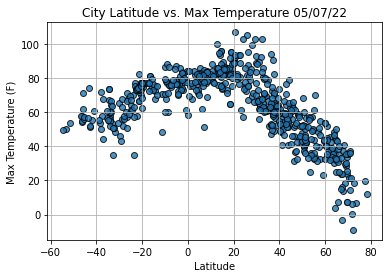

In [15]:
#Latitude vs max temps Scatter plot

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

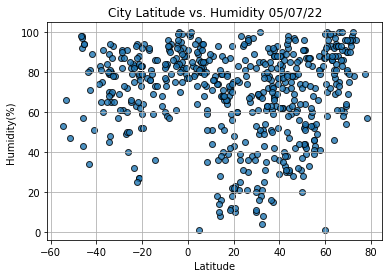

In [19]:
#Latitude vs humidity Scatter plot

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%) ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

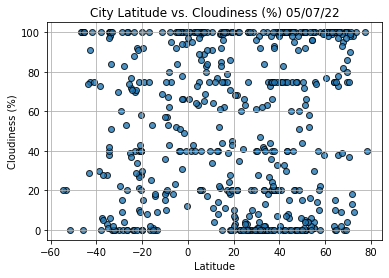

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

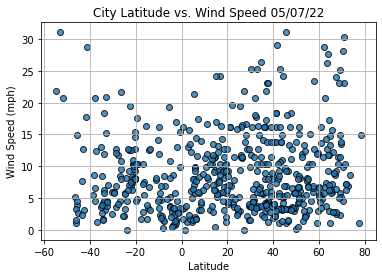

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

LINEAR REGRESSION FOR NORTHERN HEMISPHERE FOR MAXIMUM TEMPERATURE

In [90]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)] 

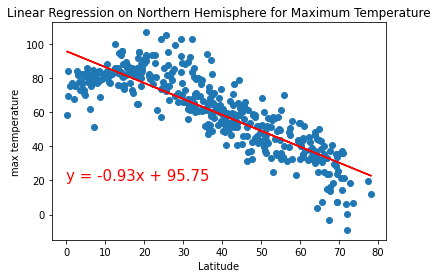

In [91]:
# Import linregress
from scipy.stats import linregress
import matplotlib.pyplot as plt


# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
#def plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature','Max Temp',(10,40)):


      # Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept



    # Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
plt.annotate(line_eq, (0,20), fontsize=15, color="red")
plt.title('Linear Regression on Northern Hemisphere for Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('max temperature')
plt.show()
    
#call the function
#plot_linear_regression(x_values,y_values, 'Linear Regression on the Northern Hemisphere \for Maximum Temperature', 'Max Temp',(10,40)

LINEAR REGRESSION FOR NORTHERN HEMISPHERE FOR MAXIMUM TEMPERATURE

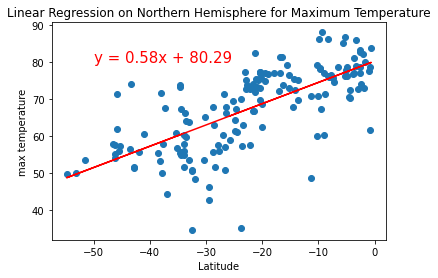

In [94]:
# Import linregress
from scipy.stats import linregress
import matplotlib.pyplot as plt


# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
#def plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature','Max Temp',(10,40)):


      # Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept



    # Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
plt.annotate(line_eq, (-50,80), fontsize=15, color="red")
plt.title('Linear Regression on Northern Hemisphere for Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('max temperature')
plt.show()
    

----------------------------------------------

In [95]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [96]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

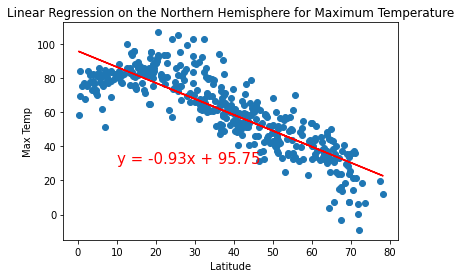

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,30))

Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

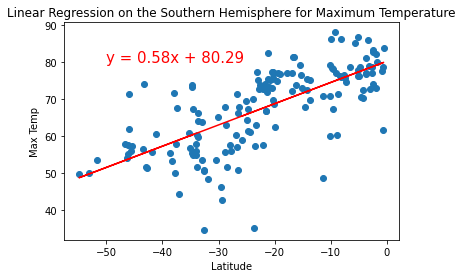

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

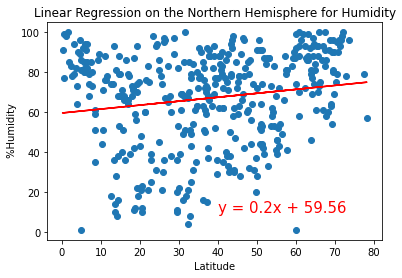

In [114]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Humidity', ' %Humidity',(40,10))

Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

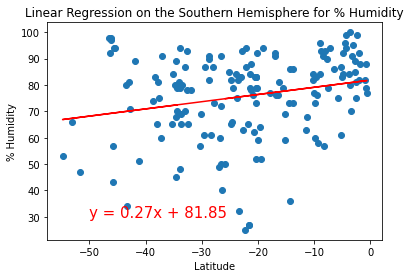

In [115]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,30))

Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

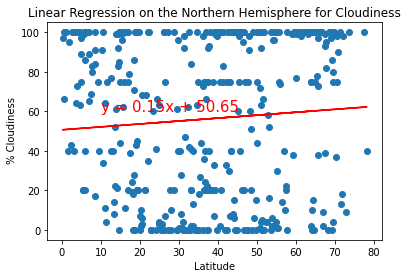

In [116]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', ' % Cloudiness',(10,60))

Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

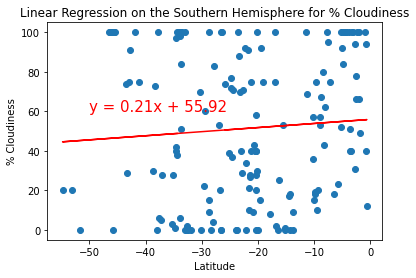

In [119]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

Perform Linear Regression on the Wind Speed for the Northern Hemisphere

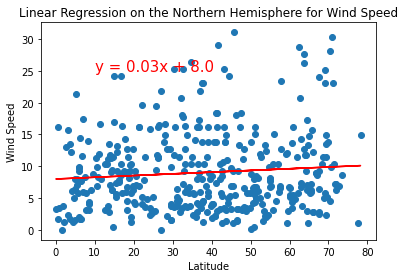

In [121]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,25))

Perform Linear Regression on the Wind Speed for the Southern Hemisphere

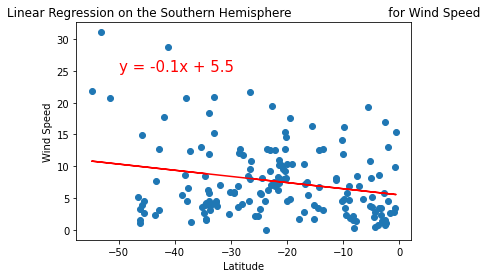

In [125]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))